<a href="https://colab.research.google.com/github/songqsh/foo1/blob/master/src/linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.geeksforgeeks.org/linear-regression-using-tensorflow/

In [47]:
#before implementation, first simply select "GPU" in the Accelerator drop-down in Notebook Settings (either through the Edit menu or the command palette at cmd/ctrl-shift-P)

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow.linalg as tfla

Found GPU at: /device:GPU:0


In [0]:
sess = tf.Session()

In [0]:
np.random.seed(101) 
tf.set_random_seed(101) 


In [0]:
# Genrating random linear data 

n = 50 # Number of data points 
# There will be n data points ranging from 0 to n 
x = np.linspace(0, n, n) 
y = np.linspace(0, n, n) 

# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, n) 
y += np.random.uniform(-4, 4, n) 




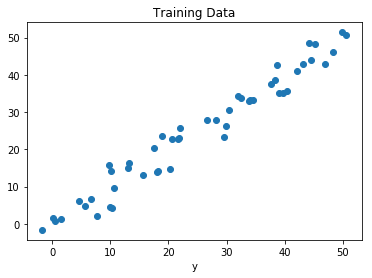

In [51]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 


- linear algebra approach

In [0]:
b = tf.constant(y, shape = [n,1])
A = tf.transpose(np.array([np.ones(n), x]))
lhs = tfla.transpose(A)@A
rhs = tfla.transpose(A)@b
alpha = tfla.solve(lhs, rhs)

In [53]:
sess.run(alpha)

array([[-0.03794613],
       [ 0.98780167]])

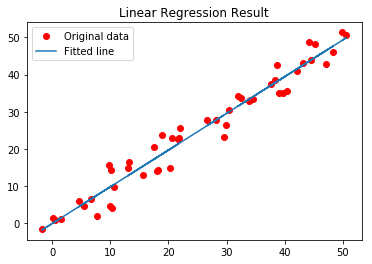

In [54]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, y_pred, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 

- Gradient Descent approach

In [0]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 

In [0]:
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 


In [0]:
learning_rate = 0.005
training_epochs = 5000

In [0]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 

# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 

# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

# Global Variables Initializer 
init = tf.global_variables_initializer() 


In [59]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
	
	# Initializing the Variables 
	sess.run(init) 
	
	# Iterating through all the epochs 
	for epoch in range(training_epochs): 
		
		# Feeding each data point into the optimizer using Feed Dictionary 
		for (_x, _y) in zip(x, y): 
			sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
		
		# Displaying the result after every 50 epochs 
		if (epoch + 1) % 50 == 0: 
			# Calculating the cost a every epoch 
			c = sess.run(cost, feed_dict = {X : x, Y : y}) 
			print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
	
	# Storing necessary values to be used outside the Session 
	training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
	weight = sess.run(W) 
	bias = sess.run(b) 


Epoch 50 : cost = 5.492666 W = 0.98134327 b = 1.2846274
Epoch 100 : cost = 5.4442453 W = 0.9832994 b = 1.1951344
Epoch 150 : cost = 5.401024 W = 0.9851376 b = 1.1110406
Epoch 200 : cost = 5.362418 W = 0.98686475 b = 1.0320228
Epoch 250 : cost = 5.3279157 W = 0.9884878 b = 0.9577729
Epoch 300 : cost = 5.297059 W = 0.99001276 b = 0.8880045
Epoch 350 : cost = 5.269449 W = 0.9914457 b = 0.8224473
Epoch 400 : cost = 5.2447257 W = 0.9927922 b = 0.7608474
Epoch 450 : cost = 5.22257 W = 0.9940574 b = 0.70296293
Epoch 500 : cost = 5.202704 W = 0.99524635 b = 0.64857274
Epoch 550 : cost = 5.1848745 W = 0.9963634 b = 0.5974642
Epoch 600 : cost = 5.168865 W = 0.99741316 b = 0.54943967
Epoch 650 : cost = 5.154476 W = 0.99839956 b = 0.5043132
Epoch 700 : cost = 5.141534 W = 0.9993264 b = 0.4619104
Epoch 750 : cost = 5.129883 W = 1.0001973 b = 0.4220671
Epoch 800 : cost = 5.119386 W = 1.0010157 b = 0.3846279
Epoch 850 : cost = 5.109922 W = 1.0017847 b = 0.34944755
Epoch 900 : cost = 5.1013784 W = 1.0

In [60]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 


Training cost = 5.012581 Weight = 1.0136894 bias = -0.19518918 



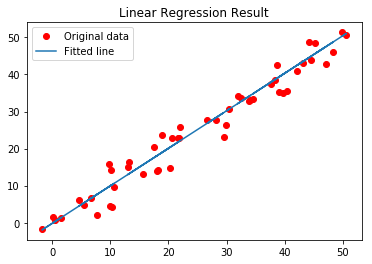

In [61]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 
